## Lap State Locations
This notebook is a simple script to calculate where the ideal lap state location points are.

Pit Start Arc: 115.29526969674424
Pit Center Arc: 1055.3165683121185
Center Pit Arc: 1093.7091990052456
Pit Speedup Arc: 160.21269895019626
Pit Decel Arc: 2003.823017429067


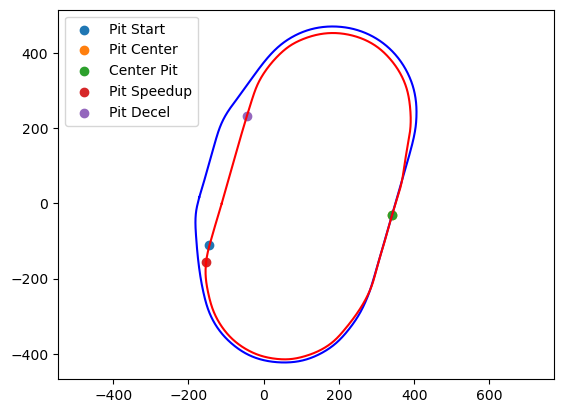

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


track='auto-tms'
center_line = np.loadtxt(f'../maps/{track}/center_line.csv', delimiter=',')
pit_lane = np.loadtxt(f'../maps/{track}/pit_lane.csv', delimiter=',')

# Remove Z-Coordinate and Velocity
center_line = center_line[:,0:2]
pit_lane = pit_lane[:,0:2]

# Approximate Arc Length for each line
center_arc = np.insert(np.cumsum(np.linalg.norm(np.diff(center_line, axis=0), axis=1)),0,0)
pit_arc = np.insert(np.cumsum(np.linalg.norm(np.diff(pit_lane, axis=0), axis=1)),0,0)

# Horizontally Stack Vectors
center_line = np.hstack((center_line, center_arc[:,None]))
pit_lane = np.hstack((pit_lane, pit_arc[:,None]))

# Pit Start Pos - Find Arc Length at Closest Point
pit_start_x = -137
pit_start_y = -113

# Find Closest Point on Pit Lane
pit_start_idx = np.argmin(np.linalg.norm(pit_lane[:,0:2] - [pit_start_x, pit_start_y], axis=1))
pit_start_pos = pit_lane[pit_start_idx,0:2]
pit_start_arc = pit_lane[pit_start_idx,2]

# Find Point where Pit Lane and Center Line are Closest
pit_center_dists = cdist(pit_lane[:,0:2], center_line[:,0:2])
pit_center_idx = np.unravel_index(np.argmin(pit_center_dists, axis=None), pit_center_dists.shape)
pit_center_pos = pit_lane[pit_center_idx[0],0:2]
pit_center_arc = pit_lane[pit_center_idx[0],2]

# Reverse Calculation to Find Center Line Idx
center_pit_dists = cdist(center_line[:,0:2], pit_lane[:,0:2])
center_pit_idx = np.unravel_index(np.argmin(center_pit_dists, axis=None), center_pit_dists.shape)
center_pit_pos = center_line[center_pit_idx[0],0:2]
center_pit_arc = center_line[center_pit_idx[0],2]

# Calculate Pit Lane Speed up Idx (60 m ahead of pit start)
pit_speedup_idx = (pit_start_idx + 60) % pit_lane.shape[0]
pit_speedup_pos = pit_lane[pit_speedup_idx,0:2]
pit_speedup_arc = pit_lane[pit_speedup_idx,2]

# Calculate Pit Deceleration Point (At Pit Entry Straight) - Just Guess
pit_decel_x = -100
pit_decel_y = 250
pit_decel_idx = np.argmin(np.linalg.norm(pit_lane[:,0:2] - [pit_decel_x, pit_decel_y], axis=1))
pit_decel_pos = pit_lane[pit_decel_idx,0:2]
pit_decel_arc = pit_lane[pit_decel_idx,2]

# Print Arc Lengths
print(f'Pit Start Arc: {pit_start_arc}')
print(f'Pit Center Arc: {pit_center_arc}')
print(f'Center Pit Arc: {center_pit_arc}')
print(f'Pit Speedup Arc: {pit_speedup_arc}')
print(f'Pit Decel Arc: {pit_decel_arc}')

# Plot
plt.plot(center_line[:,0], center_line[:,1], 'b')
plt.plot(pit_lane[:,0], pit_lane[:,1], 'r')
plt.scatter(pit_start_pos[0], pit_start_pos[1], label = 'Pit Start')
plt.scatter(pit_center_pos[0], pit_center_pos[1], label = 'Pit Center')
plt.scatter(center_pit_pos[0], center_pit_pos[1], label = 'Center Pit')
plt.scatter(pit_speedup_pos[0], pit_speedup_pos[1], label = 'Pit Speedup')
plt.scatter(pit_decel_pos[0], pit_decel_pos[1], label = 'Pit Decel')
plt.axis('equal')
plt.legend()
plt.show()